In [21]:
import pandas as pd
import numpy as np
import re
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline  
from collections import defaultdict
from collections import Counter
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
import matplotlib.pylab as plt
import string

In [2]:
check= pd.read_csv("C:/Users/Archit Jhingan/Desktop/twitter-user-gender-classification/gender-classifier-DFE-791531.csv", encoding='latin1')

In [3]:
check.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
check.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
user = pd.read_csv("C:/Users/Archit Jhingan/Desktop/twitter-user-gender-classification/gender-classifier-DFE-791531.csv",usecols= [0,5,6,19,17,21,10,11],encoding='latin1')

In [6]:
user.head()

,_unit_id,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count
0,815719226,male,1.0000,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,1.0000,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471
2,815719228,male,0.6625,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617
3,815719229,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462


In [65]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s = s.replace("ù"," ")
    s = s.replace(" ù] "," ")
    s = s.replace("ü"," ")
    s = s.replace("like"," ")
    return s

user['text_norm'] = [cleaning(s) for s in user['text']]
user['Description'] = [cleaning(s) for s in user['description']]
useless = stopwords.words('english') + list(string.punctuation)
user['text_norm'] = user['text_norm'].apply(wordpunct_tokenize)
user['text_norm'] = user['text_norm'].apply(lambda x : [item for item in x if item not in useless])

In [64]:
user.head()

,_unit_id,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count,text_norm,Description
0,815719226,male,1.0000,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,robbie e responds to critics after win against...,i sing my own rhythm
1,815719227,male,1.0000,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,ûïit felt they were my friends and i was li...,i m the author of novels filled with family dr...
2,815719228,male,0.6625,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,815719229,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,hi jordanspieth looking at the url do you use ...,mobile guy ers shazam google kleiner perkins y...
4,815719230,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,watching neighbours on sky catching up with th...,ricky wilson the best frontman kaiser chiefs t...


In [46]:
user.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [47]:
data = user[user['gender:confidence']==1]

In [48]:
data.head()

,_unit_id,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count,text_norm,Description
0,815719226,male,1.0,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm
1,815719227,male,1.0,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ûïit, felt, friends, living, story, û, arngey...",i m the author of novels filled with family dr...
3,815719229,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,"[hi, jordanspieth, looking, url, use, ifttt, t...",mobile guy ers shazam google kleiner perkins y...
4,815719230,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,"[watching, neighbours, sky, catching, neighbs,...",ricky wilson the best frontman kaiser chiefs t...
5,815719231,female,1.0,you don't know me.,3901,0,"Ive seen people on the train with lamps, chair...",20036,"[ive, seen, people, train, lamps, chairs, tvs,...",you don t know me


In [49]:
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Brand = data[data['gender'] == 'brand']

In [50]:
Male_Words = pd.Series(' '.join(Male['text_norm'].astype(str)).lower().split(" ")).value_counts()[:20] 
Female_Words = pd.Series(' '.join(Female['text_norm'].astype(str)).lower().split(" ")).value_counts()[:20]

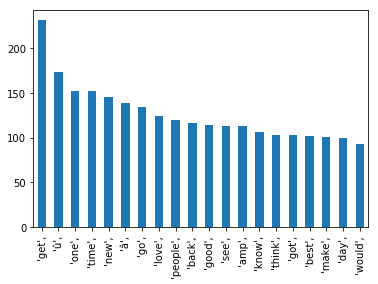

In [51]:
Male_Words.plot(kind='bar')

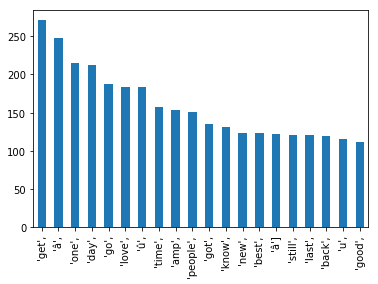

In [52]:
Female_Words.plot(kind='bar')

In [16]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data['text_norm'].astype(str))

encoder = LabelEncoder()
y = encoder.fit_transform(data['gender'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print(logistic.score(x_test, y_test))

0.536252692032
